In [3275]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

import seaborn as sns

In [3276]:
DATASET_PATH = './train.csv'
PREPARED_DATASET_PATH = './test.csv'
import os
os.getcwd()

'C:\\Users\\ИнтелАв\\Desktop\\Билиотки DATA SCIENTIST\\real-estate-price-prediction-moscow'

In [3277]:
os.chdir('C:\\Users\\ИнтелАв\\Desktop\\Билиотки DATA SCIENTIST\\real-estate-price-prediction-moscow')
os.getcwd()

'C:\\Users\\ИнтелАв\\Desktop\\Билиотки DATA SCIENTIST\\real-estate-price-prediction-moscow'

In [3278]:
train_df = pd.read_csv(DATASET_PATH, sep=',')
test_df = pd.read_csv(PREPARED_DATASET_PATH, sep=',')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [3279]:
train_df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True) 
train_df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
train_df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)

test_df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True) 
test_df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
test_df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)


house_floor_condition = train_df['HouseFloor'] < train_df['Floor']
train_df.loc[house_floor_condition, 'HouseFloor'] = train_df.loc[house_floor_condition, 'Floor']

house_floor_condition = test_df['HouseFloor'] < test_df['Floor']
test_df.loc[house_floor_condition, 'HouseFloor'] = test_df.loc[house_floor_condition, 'Floor']

In [3280]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,NaN,0,0,1,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,NaN,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,NaN,1,9,1,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,1,1,2,629,1,NaN,0,0,0,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,NaN,1,5,1,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1,171842.411855


In [3281]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = train_df['HouseYear'].median()

In [3282]:
train_df.loc[(train_df['Square'] > 150) & (train_df['Rooms'] < 4) & (train_df['Rooms'] != 0) , 'Square'] = 35 * train_df['Rooms']

In [3283]:
#train_df.describe()
train_df[train_df['Square'] == 0 ]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [3284]:
#train_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)
#test_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)

In [3285]:
train_df['LifeSquare'].isna().sum()

2113

In [3286]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [3287]:
train_df['ind0'] = [x for x in range(len(train_df))]

In [3288]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,ind0
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,2
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,3
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,33,8667,2,NaN,0,6,1,343995.102962,4


In [3289]:
df_drop = train_df[['LifeSquare', 'ind0', 'Price']]
target_name = 'Healthcare_1'
train_df.drop(['LifeSquare', 'Price'], axis=1, inplace=True)

In [3290]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
   # plt.xlim(-1, 1200)
   # plt.ylim(-1, 1200)
    plt.show()

In [3291]:
train_df['nan'] = 0
train_df.loc[train_df[target_name].isna(), 'nan'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ind0,nan
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,NaN,0,0,1,0,1
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,1,0
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,2,0
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1,3,1
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,NaN,0,6,1,4,1


In [3292]:
df_test_HC = train_df[train_df['nan'] == 1]
df_train_HC = train_df[train_df['nan'] == 0]

In [3293]:
target_name = 'Healthcare_1'
df_train_HC = df_train_HC.drop(columns='nan')


In [3294]:
df_train_HC.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ind0
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,1
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,2
5,5804,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,1,1,35,5776,1,2078.0,2,4,1,5
6,8864,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,1,1,24,4860,1,80.0,0,3,1,6
7,13072,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,1,1,37,7687,11,176.0,5,5,1,7


In [3295]:
X = df_train_HC.drop(columns=[target_name, 'ind0'])
y = df_train_HC[target_name]

Train R2:	1.0
Test R2:	0.996


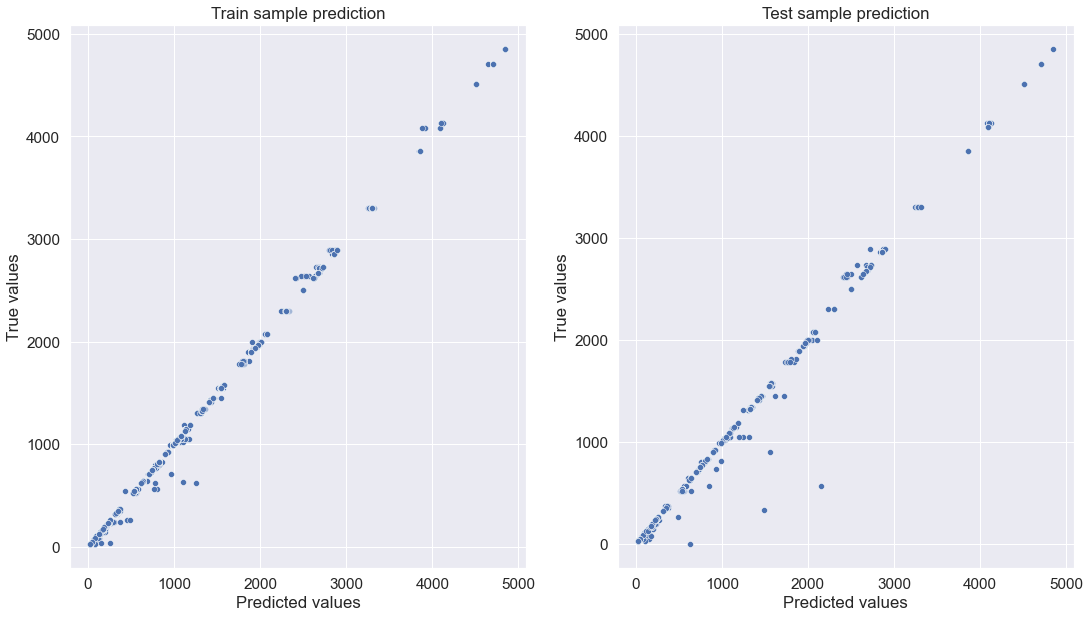

In [3296]:
X_train_HC, X_valid_HC, y_train_HC, y_valid_HC = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train_HC, y_train_HC)

y_train_preds_HC = rf_model.predict(X_train_HC)
y_test_preds_HC = rf_model.predict(X_valid_HC)

evaluate_preds(y_train_HC, y_train_preds_HC, y_valid_HC, y_test_preds_HC)

In [3297]:
v = [x for x in df_test_HC['ind0']]
df_test_HC = df_test_HC.drop(columns=[target_name, 'ind0'])
df_test_HC = df_test_HC.drop(columns='nan')

In [3298]:
df_test_HC[target_name] = rf_model.predict(df_test_HC)

In [3299]:
df_test_HC

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Healthcare_1
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,837.93
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,367.00
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,2104.52
8,9951,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,1,1,264,0,0,1,1,367.00
11,16755,88,2.0,53.975144,8.0,2,12.0,1978,0.127376,1,1,43,8429,3,3,9,1,1944.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,0.0,4,22.0,2016,0.007122,1,1,1,264,0,0,1,1,365.32
9995,1260,61,2.0,49.090728,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,1579.03
9996,16265,27,2.0,64.307684,9.0,13,13.0,1977,0.072158,1,1,2,629,1,0,0,0,506.22
9997,2795,178,1.0,29.648057,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,2482.07


In [3300]:
df_test_HC[target_name] = df_test_HC[target_name].apply(int)

In [3301]:
df_test_HC['ind0'] = v

In [3302]:
train_df2 = pd.concat([df_train_HC, df_test_HC]) 

In [3303]:
train_df2 = train_df2.sort_values(by=['ind0'])

In [3304]:
train_df2 = train_df2.merge(df_drop, left_on='ind0', right_on='ind0', how='left')

In [3305]:
#train_df2 = train_df2[[x for x in train_df2.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

### предскажем значения NAN для test данных HC

In [3306]:
test_df['ind0'] = [x for x in range(len(test_df))]
df_drop_test = test_df[['LifeSquare', 'ind0']]
test_df.drop(['LifeSquare'], axis=1, inplace=True)

df_test_test_HC = test_df[test_df['Healthcare_1'].isna() == 1]
df_test_train_HC = test_df[test_df['Healthcare_1'].isna() == 0]


In [3307]:
test_df

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ind0
0,4567,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1,0
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0,1
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1,2
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,1,1,2,475,0,NaN,0,0,1,3
4,746,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,5.0,6,6.0,1962,0.069660,1,1,31,6119,4,NaN,1,2,1,4995
4996,16138,38,3.0,93.698122,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,520.0,0,7,1,4996
4997,3912,101,1.0,33.656723,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,1015.0,2,5,1,4997
4998,5722,10,1.0,38.635155,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,NaN,0,11,1,4998


In [3308]:
ind0 = [x for x in df_test_test_HC['ind0']]
df_test_test_HC = df_test_test_HC.drop(columns=[target_name, 'ind0'])

In [3309]:
df_test_test_HC

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1
6,672,62,1.0,46.269456,11.0,8,17.0,2014,0.072158,1,1,2,629,1,0,0,0
7,2471,2,2.0,48.172969,6.0,4,9.0,1974,0.000000,1,1,33,7425,1,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,11890,1,2.0,66.683295,1.0,6,17.0,1977,0.007122,1,1,1,264,0,0,1,1
4989,13069,1,2.0,61.747208,0.0,5,17.0,1977,0.007122,1,1,1,264,0,0,1,1
4994,13060,25,2.0,51.144906,1.0,18,25.0,2015,0.069753,1,1,53,13670,4,1,11,1
4995,10379,29,2.0,43.177521,5.0,6,6.0,1962,0.069660,1,1,31,6119,4,1,2,1


In [3310]:
df_test_test_HC[target_name] = rf_model.predict(df_test_test_HC)

In [3311]:
df_test_test_HC[target_name] = df_test_test_HC[target_name].apply(int)
df_test_test_HC['ind0'] = ind0

In [3312]:
test_df2 = pd.concat([df_test_test_HC, df_test_train_HC]) 



In [3313]:

test_df2 = test_df2.sort_values(by=['ind0'])

In [3314]:


test_df2 = test_df2.merge(df_drop_test, left_on='ind0', right_on='ind0', how='left')

In [3315]:


#test_df2 = test_df2[[x for x in test_df2.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

In [3316]:
test_df2

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Healthcare_1,ind0,LifeSquare
0,4567,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,1036.0,0,19.094182
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,500.0,1,42.568133
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,758.0,2,NaN
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,265.0,3,33.893825
4,746,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,990.0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,5.0,6,6.0,1962,0.069660,1,1,31,6119,4,1,2,1,791.0,4995,30.339945
4996,16138,38,3.0,93.698122,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,0,7,1,520.0,4996,94.521465
4997,3912,101,1.0,33.656723,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,2,5,1,1015.0,4997,19.003259
4998,5722,10,1.0,38.635155,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,0,11,1,871.0,4998,20.976257


### Healthcare_1 полностью предсказали. теперь предсказываем LifeSquare

In [3317]:
df_drop2 = train_df2[['ind0', 'Price']]
target_name = 'LifeSquare'

In [3318]:
df_train_test_LS = train_df2[(train_df2['LifeSquare'].isna() == 1) | (train_df2['LifeSquare'] < train_df2['Square'] /2) | (train_df2['LifeSquare'] > train_df2['Square'] *0.65)]
df_train_train_LS = train_df2[(train_df2['LifeSquare'].isna() == 0 ) & (train_df2['LifeSquare'] >= train_df2['Square'] /2) & (train_df2['LifeSquare'] <= train_df2['Square'] *0.65)]

In [3319]:
df_train_test_LS = df_train_test_LS.drop(columns=['Price'])
df_train_train_LS = df_train_train_LS.drop(columns=['Price'])

In [3320]:
df_train_test_LS

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,ind0,LifeSquare
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,837.0,0,0,1,0,NaN
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1,3,NaN
5,5804,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,1,1,35,5776,1,2078.0,2,4,1,5,47.103833
7,13072,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,1,1,37,7687,11,176.0,5,5,1,7,32.893256
8,9951,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1,8,44.628132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,11173,6,2.0,62.648779,0.0,6,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,9991,NaN
9993,9289,1,3.0,84.486078,0.0,4,22.0,2016,0.007122,1,1,1,264,0,365.0,0,1,1,9993,88.931509
9994,4356,9,1.0,43.303458,8.0,12,14.0,1992,0.161532,1,1,25,5648,1,30.0,2,4,1,9994,21.519087
9995,1260,61,2.0,49.090728,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1579.0,1,9,1,9995,33.272626


In [3321]:
X = df_train_train_LS.drop(columns=[target_name, 'ind0'])
y = df_train_train_LS[target_name]

Train R2:	0.996
Test R2:	0.973


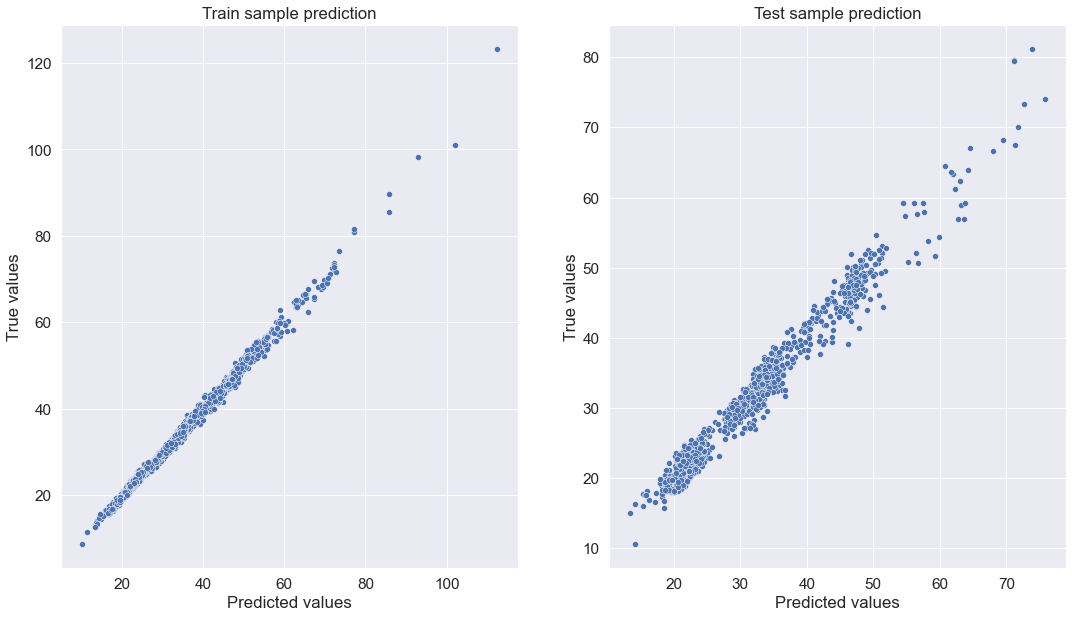

In [3322]:
X_train_LS, X_valid_LS, y_train_LS, y_valid_LS = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model_LS = RandomForestRegressor(random_state=21, criterion='mse')
rf_model_LS.fit(X_train_LS, y_train_LS)

y_train_preds_LS = rf_model_LS.predict(X_train_LS)
y_test_preds_LS = rf_model_LS.predict(X_valid_LS)

evaluate_preds(y_train_LS, y_train_preds_LS, y_valid_LS, y_test_preds_LS)

In [3323]:
v = [x for x in df_train_test_LS['ind0']]
df_train_test_LS.drop(columns=[target_name, 'ind0'], axis=1, inplace=True)

In [3324]:
df_train_test_LS

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,837.0,0,0,1
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1
5,5804,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,1,1,35,5776,1,2078.0,2,4,1
7,13072,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,1,1,37,7687,11,176.0,5,5,1
8,9951,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,11173,6,2.0,62.648779,0.0,6,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1
9993,9289,1,3.0,84.486078,0.0,4,22.0,2016,0.007122,1,1,1,264,0,365.0,0,1,1
9994,4356,9,1.0,43.303458,8.0,12,14.0,1992,0.161532,1,1,25,5648,1,30.0,2,4,1
9995,1260,61,2.0,49.090728,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1579.0,1,9,1


In [3325]:
df_train_test_LS[target_name] = rf_model_LS.predict(df_train_test_LS)

In [3326]:
df_train_test_LS[target_name] = df_train_test_LS[target_name].apply(int)

df_train_test_LS['ind0'] = v

In [3327]:
train_df3 = pd.concat([df_train_test_LS, df_train_train_LS]) 

In [3328]:
train_df3 = train_df3.sort_values(by=['ind0'])

train_df3 = train_df3.merge(df_drop2, left_on='ind0', right_on='ind0', how='left')

#train_df3 = train_df3[[x for x in train_df3.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

In [3329]:
train_df3

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare,ind0,Price
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,1,...,11,3097,0,837.0,0,0,1,71.000000,0,305018.871089
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,1,...,30,6207,1,1183.0,1,0,1,23.169223,1,177734.553407
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,1,...,33,5261,0,240.0,3,1,1,47.671972,2,282078.720850
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,...,1,264,0,367.0,0,1,1,22.000000,3,168106.007630
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,1,...,33,8667,2,2104.0,0,6,1,38.562517,4,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,6.0,3,12.0,1981,0.300323,1,...,52,10311,6,1579.0,1,9,1,30.000000,9995,119367.455796
9996,16265,27,2.0,64.307684,9.0,13,13.0,1977,0.072158,1,...,2,629,1,506.0,0,0,0,37.038420,9996,199715.148807
9997,2795,178,1.0,29.648057,5.0,3,5.0,1958,0.460556,1,...,20,4386,14,2482.0,1,5,1,16.555363,9997,165953.912580
9998,14561,21,1.0,32.330292,5.0,3,9.0,1969,0.194489,1,...,47,8004,3,125.0,3,5,1,19.000000,9998,171842.411855


## предскажем значения NAN для test данных LS

In [3330]:
test_df2['ind0'] = [x for x in range(len(test_df2))]
df_drop_test2 = test_df2[['ind0']]

df_test_test_LS = test_df2[(test_df2['LifeSquare'].isna() == 1) | (test_df2['LifeSquare'] < test_df2['Square'] /2) | (test_df2['LifeSquare'] > test_df2['Square'] *0.65)]
df_test_train_LS = test_df2[(test_df2['LifeSquare'].isna() == 0 ) & (test_df2['LifeSquare'] >= test_df2['Square'] /2) & (test_df2['LifeSquare'] <= test_df2['Square'] *0.65)]

In [3331]:
ind0 = [x for x in df_test_test_LS['ind0']]
df_test_test_LS = df_test_test_LS.drop(columns=[target_name, 'ind0'])

In [3332]:
df_test_test_LS[target_name] = rf_model_LS.predict(df_test_test_LS)

In [3333]:
df_test_test_LS[target_name] = df_test_test_LS[target_name].apply(int)
df_test_test_LS['ind0'] = ind0

In [3334]:
test_df3 = pd.concat([df_test_test_LS, df_test_train_LS]) 

In [3335]:
test_df3 = test_df3.sort_values(by=['ind0'])

test_df3 = test_df3.merge(df_drop_test2, left_on='ind0', right_on='ind0', how='left')

#test_df3 = test_df3[[x for x in test_df3.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

test_df3

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Healthcare_1,LifeSquare,ind0
0,4567,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,1036.0,19.094182,0
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,500.0,22.000000,1
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,758.0,34.000000,2
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,265.0,30.000000,3
4,746,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,990.0,31.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,5.0,6,6.0,1962,0.069660,1,1,31,6119,4,1,2,1,791.0,27.000000,4995
4996,16138,38,3.0,93.698122,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,0,7,1,520.0,55.000000,4996
4997,3912,101,1.0,33.656723,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,2,5,1,1015.0,19.003259,4997
4998,5722,10,1.0,38.635155,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,0,11,1,871.0,20.976257,4998


### LifeSquare полностью предсказали. теперь предсказываем KitchenSquare

In [3336]:
df_drop3 = train_df3[['ind0', 'Price']]
target_name = 'KitchenSquare'

In [3337]:
df_train_test_KS = train_df3[(train_df3[target_name] < 3) | (train_df3[target_name] > train_df2['Square'] *0.25)]
df_train_train_KS = train_df3[(train_df3[target_name] >= 3) & (train_df3[target_name] <= train_df2['Square'] *0.25)]

In [3338]:
df_train_test_KS = df_train_test_KS.drop(columns=['Price'])
df_train_train_KS = df_train_train_KS.drop(columns=['Price'])

df_train_test_KS

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare,ind0
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1,22.000000,3
6,8864,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,1,1,24,4860,1,80.0,0,3,1,21.772930,6
8,9951,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1,25.000000,8
9,8094,6,3.0,79.867477,1.0,3,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1,45.000000,9
12,898,93,1.0,47.564443,13.0,9,24.0,2012,0.050900,1,1,43,10621,1,30.0,2,3,1,25.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,647,1,2.0,63.324025,1.0,4,17.0,1977,0.007122,1,1,1,264,0,367.0,0,1,1,36.000000,9983
9985,277,93,1.0,34.723984,9.0,6,16.0,1988,0.521867,1,1,25,6149,0,762.0,0,0,1,19.840550,9985
9990,10635,21,1.0,18.983962,2.0,1,5.0,1967,0.194489,1,1,47,8004,3,125.0,3,5,1,11.419796,9990
9991,11173,6,2.0,62.648779,0.0,6,17.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,35.000000,9991


In [3339]:
X = df_train_train_KS.drop(columns=[target_name, 'ind0'])
y = df_train_train_KS[target_name]

Train R2:	0.965
Test R2:	0.735


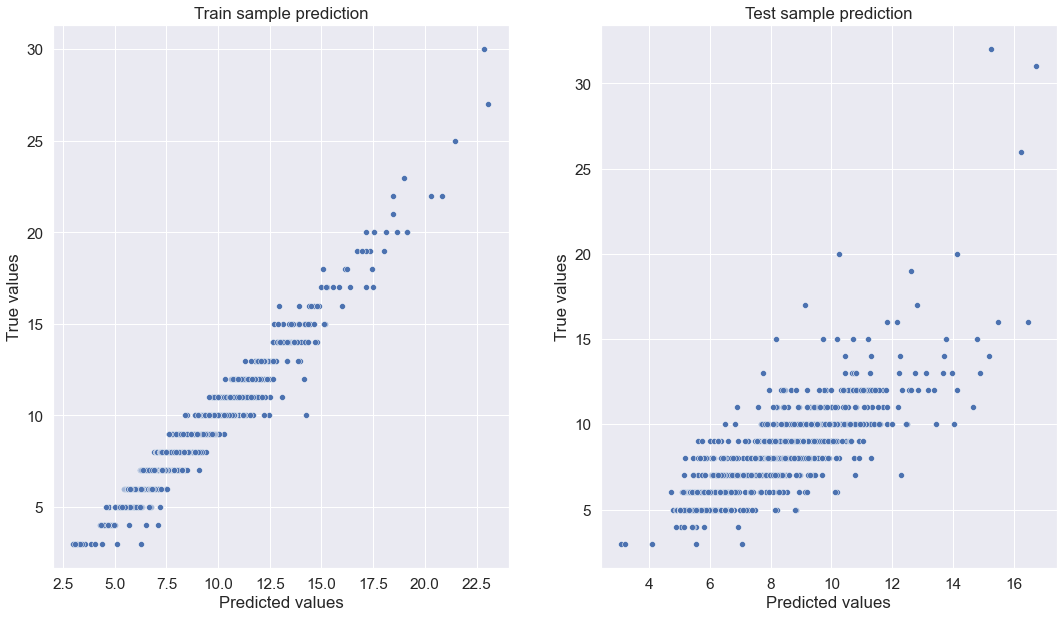

In [3340]:
X_train_KS, X_valid_KS, y_train_KS, y_valid_KS = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model_KS = RandomForestRegressor(random_state=21, criterion='mse')
rf_model_KS.fit(X_train_KS, y_train_KS)

y_train_preds_KS = rf_model_KS.predict(X_train_KS)
y_test_preds_KS = rf_model_KS.predict(X_valid_KS)

evaluate_preds(y_train_KS, y_train_preds_KS, y_valid_KS, y_test_preds_KS)

In [3341]:
v = [x for x in df_train_test_KS['ind0']]
df_train_test_KS.drop(columns=[target_name, 'ind0'], axis=1, inplace=True)

df_train_test_KS[target_name] = rf_model_KS.predict(df_train_test_KS)

df_train_test_KS[target_name] = df_train_test_KS[target_name].apply(int)

df_train_test_KS['ind0'] = v

train_df4 = pd.concat([df_train_test_KS, df_train_train_KS]) 

train_df4 = train_df4.sort_values(by=['ind0'])

train_df4 = train_df4.merge(df_drop3, left_on='ind0', right_on='ind0', how='left')

#train_df4 = train_df4[[x for x in train_df4.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

train_df4

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare,KitchenSquare,ind0,Price
0,11809,27,3.0,115.027311,4,10.0,2014,0.075424,1,1,...,3097,0,837.0,0,0,1,71.000000,10.0,0,305018.871089
1,3013,22,1.0,39.832524,7,8.0,1966,0.118537,1,1,...,6207,1,1183.0,1,0,1,23.169223,8.0,1,177734.553407
2,8215,1,3.0,78.342215,2,17.0,1988,0.025609,1,1,...,5261,0,240.0,3,1,1,47.671972,10.0,2,282078.720850
3,2352,1,1.0,40.409907,10,22.0,1977,0.007122,1,1,...,264,0,367.0,0,1,1,22.000000,9.0,3,168106.007630
4,13866,94,2.0,64.285067,16,16.0,1972,0.282798,1,1,...,8667,2,2104.0,0,6,1,38.562517,9.0,4,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,3,12.0,1981,0.300323,1,1,...,10311,6,1579.0,1,9,1,30.000000,6.0,9995,119367.455796
9996,16265,27,2.0,64.307684,13,13.0,1977,0.072158,1,1,...,629,1,506.0,0,0,0,37.038420,9.0,9996,199715.148807
9997,2795,178,1.0,29.648057,3,5.0,1958,0.460556,1,1,...,4386,14,2482.0,1,5,1,16.555363,5.0,9997,165953.912580
9998,14561,21,1.0,32.330292,3,9.0,1969,0.194489,1,1,...,8004,3,125.0,3,5,1,19.000000,5.0,9998,171842.411855


## предскажем значения NAN для test данных KS

In [3342]:

test_df3['ind0'] = [x for x in range(len(test_df3))]
df_drop_test3 = test_df3[['ind0']]

df_test_test_KS = test_df3[(test_df3[target_name] < 3) | (test_df3[target_name] > test_df3['Square'] *0.25)]
df_test_train_KS = test_df3[(test_df3[target_name] >= 3) & (test_df3[target_name] <= test_df3['Square'] *0.25)]

ind0 = [x for x in df_test_test_KS['ind0']]
df_test_test_KS = df_test_test_KS.drop(columns=[target_name, 'ind0'])

df_test_test_KS[target_name] = rf_model_KS.predict(df_test_test_KS)

df_test_test_KS[target_name] = df_test_test_KS[target_name].apply(int)
df_test_test_KS['ind0'] = ind0

test_df4 = pd.concat([df_test_test_KS, df_test_train_KS]) 

test_df4 = test_df4.sort_values(by=['ind0'])

test_df4 = test_df4.merge(df_drop_test3, left_on='ind0', right_on='ind0', how='left')

#test_df4 = test_df4[[x for x in test_df4.columns if x not in ['Ecology_3', 'Ecology_2', 'Shops_2', 'nan']]]

test_df4

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Healthcare_1,LifeSquare,KitchenSquare,ind0
0,4567,44,1.0,36.847630,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,1036.0,19.094182,5.0,0
1,5925,62,1.0,42.493907,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,500.0,22.000000,10.0,1
2,960,27,2.0,59.463678,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,758.0,34.000000,9.0,2
3,3848,23,3.0,49.646030,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,265.0,30.000000,6.0,3
4,746,74,1.0,53.837056,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,990.0,31.000000,10.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,6,6.0,1962,0.069660,1,1,31,6119,4,1,2,1,791.0,27.000000,5.0,4995
4996,16138,38,3.0,93.698122,21,27.0,2018,0.060753,1,1,15,2787,2,0,7,1,520.0,55.000000,10.0,4996
4997,3912,101,1.0,33.656723,2,5.0,1966,0.038693,1,1,28,6533,1,2,5,1,1015.0,19.003259,5.0,4997
4998,5722,10,1.0,38.635155,8,14.0,1970,0.089040,1,1,33,7976,5,0,11,1,871.0,20.976257,9.0,4998


In [3343]:
#train_df4.loc[train_df4["HouseFloor"] == 0, "HouseFloor"] = train_df4["Floor"]*2   #df.loc[df['Y'] > 13, 'Z'] = 777

In [3344]:
train_df4['LastFloor'] = 0
train_df4.loc[train_df4["HouseFloor"] == train_df4["Floor"] , "LastFloor"] = 1

In [3345]:
train_df4['FirstFloor'] = 0
train_df4.loc[(train_df4["Floor"] <= 2 ) & (train_df4["HouseFloor"] > 2), "FirstFloor"] = 1

In [3346]:
train_df4['PriceOfMeter'] = train_df4["Price"]/train_df4["Square"]
train_df4['Corridor'] = train_df4["Square"] - train_df4["LifeSquare"] - train_df4["KitchenSquare"]
#train_df4['MeanRoom'] = ?(train_df4["Rooms"] == 0 , train_df4["LifeSquare"], train_df4["LifeSquare"]/train_df4["Rooms"])
train_df4['MeanRoom'] = train_df4["LifeSquare"]
train_df4.loc[train_df4['Rooms'] != 0, 'MeanRoom'] =  train_df4["LifeSquare"]/train_df4["Rooms"]
#train_df4['MeanRoom'] = train_df4['MeanRoom'].astype(int)
#df.a = df.a.astype(float)
MeanMeterOfStreet = train_df4.groupby(['DistrictId', 'Rooms']).mean()[['PriceOfMeter']]
train_df4 = train_df4.drop(columns=['PriceOfMeter'])
#MeanMeterOfStreet.describe()
train_df4 = train_df4.merge(MeanMeterOfStreet, left_on=['DistrictId', 'Rooms'], right_on=['DistrictId', 'Rooms'], how='left')
train_df4
#train_df4['PriceOfMeter'] = train_df4["Price"]/train_df4["Square"]
#train_df4.loc[1 == train_df4["Floor"] , "PriceOfMeter"] = train_df4["Floor"]*

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,LifeSquare,KitchenSquare,ind0,Price,LastFloor,FirstFloor,Corridor,MeanRoom,PriceOfMeter
0,11809,27,3.0,115.027311,4,10.0,2014,0.075424,1,1,...,1,71.000000,10.0,0,305018.871089,0,0,34.027311,23.666667,2967.759574
1,3013,22,1.0,39.832524,7,8.0,1966,0.118537,1,1,...,1,23.169223,8.0,1,177734.553407,0,0,8.663301,23.169223,3939.838753
2,8215,1,3.0,78.342215,2,17.0,1988,0.025609,1,1,...,1,47.671972,10.0,2,282078.720850,0,1,20.670243,15.890657,3341.351764
3,2352,1,1.0,40.409907,10,22.0,1977,0.007122,1,1,...,1,22.000000,9.0,3,168106.007630,0,0,9.409907,22.000000,3992.354389
4,13866,94,2.0,64.285067,16,16.0,1972,0.282798,1,1,...,1,38.562517,9.0,4,343995.102962,1,0,16.722551,19.281258,4095.667990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,3,12.0,1981,0.300323,1,1,...,1,30.000000,6.0,9995,119367.455796,0,0,13.090728,15.000000,4541.566010
9996,16265,27,2.0,64.307684,13,13.0,1977,0.072158,1,1,...,0,37.038420,9.0,9996,199715.148807,1,0,18.269264,18.519210,2643.083383
9997,2795,178,1.0,29.648057,3,5.0,1958,0.460556,1,1,...,1,16.555363,5.0,9997,165953.912580,0,0,8.092693,16.555363,5597.463388
9998,14561,21,1.0,32.330292,3,9.0,1969,0.194489,1,1,...,1,19.000000,5.0,9998,171842.411855,0,0,8.330292,19.000000,4343.435315


In [3347]:
train_df4[0 == train_df4["Rooms"]]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,LifeSquare,KitchenSquare,ind0,Price,LastFloor,FirstFloor,Corridor,MeanRoom,PriceOfMeter
2194,3159,88,0.0,38.697117,9,16.0,1982,0.127376,1,1,...,1,21.0,9.0,2194,158998.110646,0,0,8.697117,21.0,4108.784399
3780,7317,27,0.0,41.790881,13,13.0,1977,0.211401,1,1,...,1,23.0,8.0,3780,98129.976788,1,0,10.790881,23.0,12291.688303
5894,770,28,0.0,49.483501,16,16.0,2015,0.118537,1,1,...,1,29.0,9.0,5894,217009.338463,1,0,11.483501,29.0,4385.488771
6401,9443,27,0.0,87.762616,5,15.0,1977,0.211401,1,1,...,1,51.0,10.0,6401,219281.918007,0,0,26.762616,51.0,12291.688303
7644,7917,27,0.0,212.932361,2,3.0,2008,0.211401,1,1,...,1,107.0,16.0,7644,302211.260887,0,1,89.932361,107.0,12291.688303
7929,456,6,0.0,81.491446,4,4.0,1977,0.243205,1,1,...,1,43.0,12.0,7929,212864.799112,1,0,26.491446,43.0,2612.112170
9767,12638,27,0.0,138.427694,4,4.0,2016,0.075424,1,1,...,1,85.0,15.0,9767,268394.744389,1,0,38.427694,85.0,12291.688303
9869,3224,27,0.0,2.377248,1,1.0,1977,0.017647,1,1,...,1,12.0,8.0,9869,126596.941798,1,0,-17.622752,12.0,12291.688303


In [3348]:
train_df4.drop(columns=['LastFloor', 'FirstFloor', 'Shops_2', 'Ecology_2', 'Ecology_3', 'Helthcare_2', 'Shops_1'], axis=1, inplace=True)

In [3349]:
#train_df.columns
target_name = 'Price'

In [3350]:
X = train_df4.drop(columns=[target_name,'ind0'])
y = train_df4[target_name]

Train R2:	0.967
Test R2:	0.772


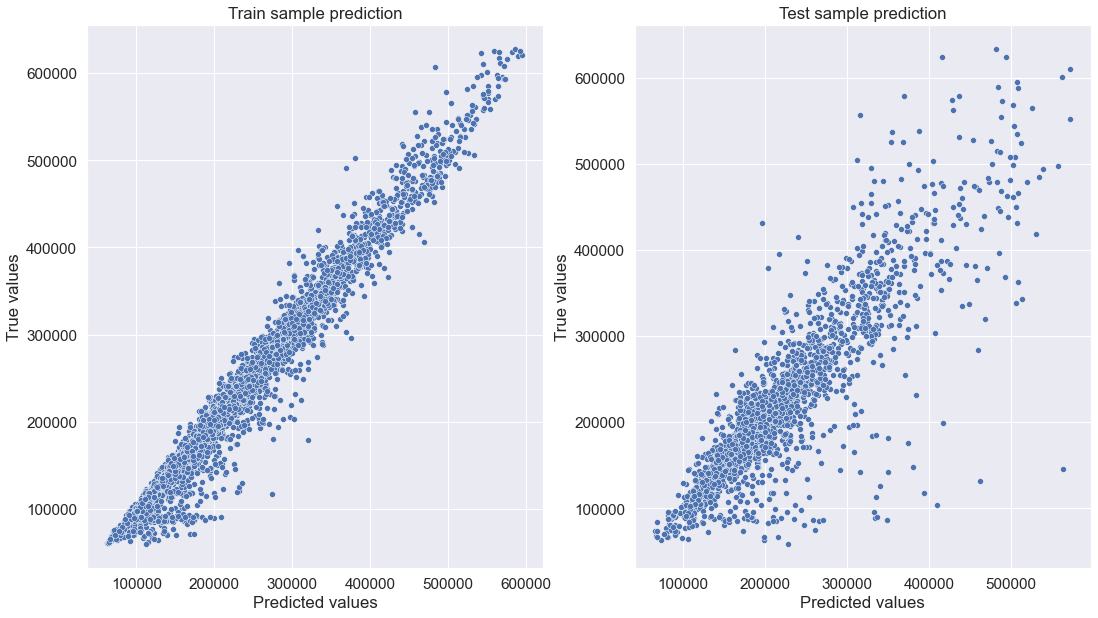

In [3351]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.24, shuffle=True, random_state=21)

rf_model_rs = RandomForestRegressor(random_state=21, criterion='mse')
rf_model_rs.fit(X_train, y_train)

y_train_preds = rf_model_rs.predict(X_train)
y_test_preds = rf_model_rs.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [3352]:
rf_model_rs.feature_importances_.flatten()

array([0.01855966, 0.01215984, 0.03608325, 0.12460421, 0.01712036,
       0.01593494, 0.01932699, 0.01058132, 0.01234972, 0.01587962,
       0.01488687, 0.01629553, 0.3303526 , 0.01117264, 0.0012634 ,
       0.02434558, 0.01690631, 0.30217716])

In [3353]:
X_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'LifeSquare',
 'KitchenSquare',
 'FirstFloor',
 'Corridor',
 'MeanRoom',
 'PriceOfMeter']

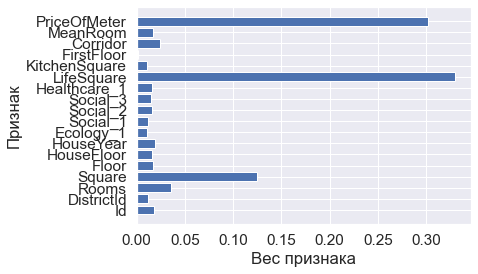

In [3354]:
plt.barh(X_train.columns.tolist(), rf_model_rs.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [3355]:
X_train['preds'] = y_train_preds

<ipython-input-3355-d80605a98796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['preds'] = y_train_preds


In [3356]:
X_train['Price'] = 0
X_train['Price'] = y_train

<ipython-input-3356-715a9bb45010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Price'] = 0
<ipython-input-3356-715a9bb45010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Price'] = y_train


In [3357]:
df_test_test_KS['ind0'] = ind0
train_df4 = train_df4.sort_values(by=['ind0'])

train_df4 = train_df4.merge(df_drop3, left_on='ind0', right_on='ind0', how='left')
#X_train

In [3358]:
X_train[(X_train['preds']  - X_train['Price'])/X_train['Price'] > 1 ]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,LifeSquare,KitchenSquare,FirstFloor,Corridor,MeanRoom,PriceOfMeter,preds,Price
5763,1437,46,3.0,85.542560,11,17.0,2008,0.188784,31,6137,4,1016.0,47.512886,11.0,0,27.029674,15.837629,4054.991739,209159.171730,90312.066596
8101,11287,17,3.0,66.086745,7,13.0,1979,0.000000,18,3374,5,620.0,40.000000,7.0,0,19.086745,13.333333,5259.635081,184610.284058,90008.836604
4826,15762,109,3.0,76.746603,15,17.0,1996,0.136330,30,6141,10,262.0,46.470198,10.0,0,20.276406,15.490066,5304.881494,274249.464340,117242.418119
6127,7590,113,3.0,94.417148,6,18.0,2008,0.050756,24,5469,1,145.0,56.749169,11.0,0,26.667979,18.916390,3999.157403,168348.690059,71057.273346
7449,3614,24,1.0,65.857744,7,22.0,2010,0.111627,50,12238,8,1970.0,36.000000,10.0,0,19.857744,36.000000,5119.497819,188089.903439,87463.729219
9241,15438,66,2.0,83.507516,2,24.0,2012,0.111627,50,12238,8,1970.0,47.000000,11.0,1,25.507516,23.500000,4807.973859,199893.836268,88909.214973
1591,14892,57,3.0,84.206197,7,7.0,2005,0.090799,74,19083,2,1278.0,49.920840,8.0,0,26.285357,16.640280,3974.715598,174250.406493,71319.376419
4140,5979,38,2.0,55.692414,6,17.0,2011,0.060753,15,2787,2,520.0,32.325039,9.0,0,14.367375,16.162519,4286.252816,150181.423201,69748.500954
4044,9726,12,3.0,76.251158,9,17.0,1992,0.090799,74,19083,2,1321.0,49.134125,10.0,0,17.117033,16.378042,3694.832448,194463.962469,89986.645751
4999,6944,143,3.0,78.188447,17,17.0,1983,0.049863,18,3746,9,75.0,44.663408,10.0,0,23.525039,14.887803,4075.470321,171699.991965,84808.029433


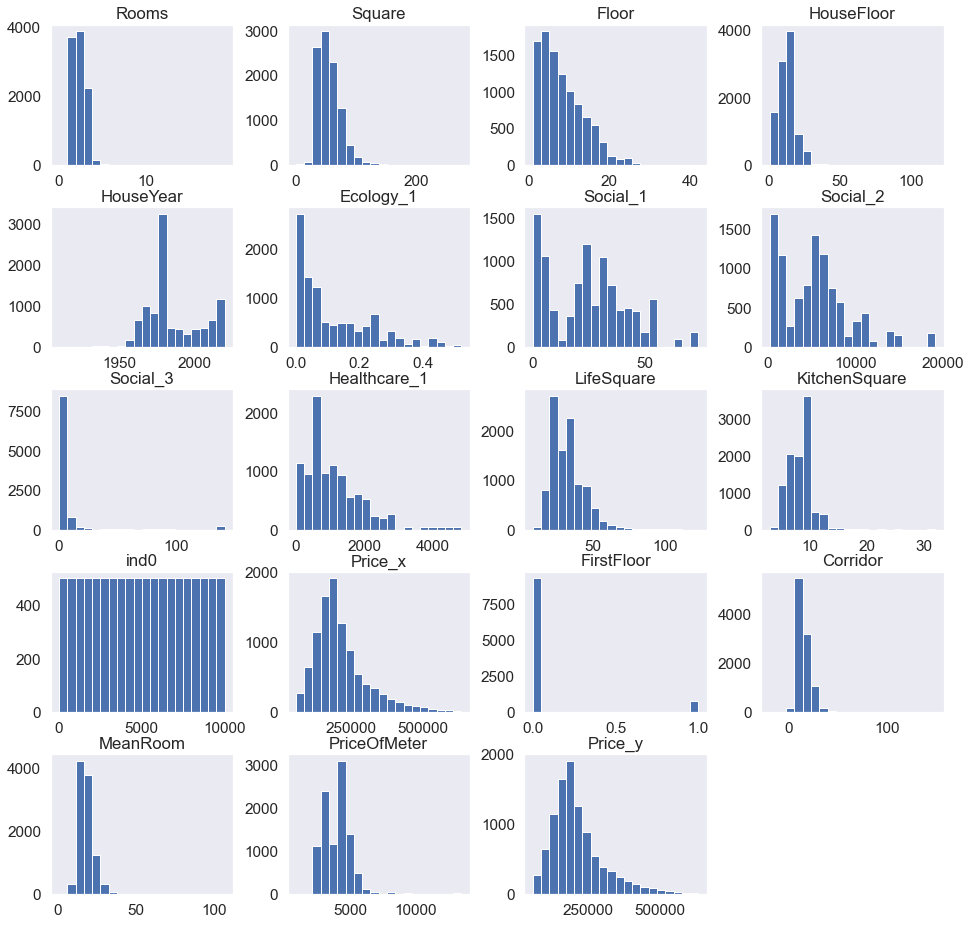

In [3359]:
train_df4.hist(figsize=(16,16), bins=20, grid=False);

In [3360]:
train_df4[train_df4['MeanRoom'].isna() == True]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1,LifeSquare,KitchenSquare,ind0,Price_x,FirstFloor,Corridor,MeanRoom,PriceOfMeter,Price_y


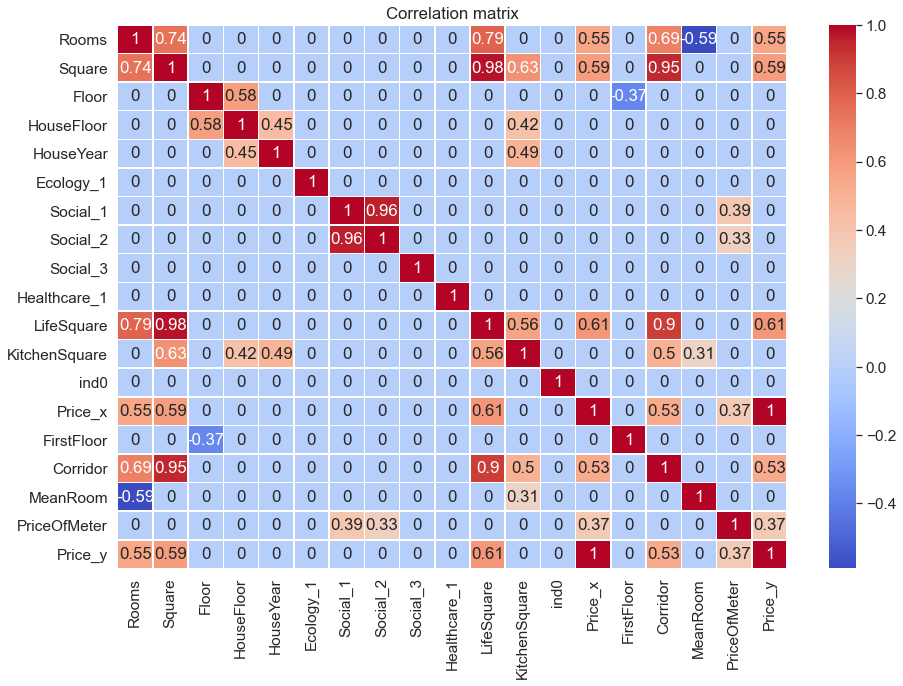

In [3361]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df4.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [3362]:
train_df4[train_df4['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Healthcare_1,LifeSquare,KitchenSquare,ind0,Price_x,FirstFloor,Corridor,MeanRoom,PriceOfMeter,Price_y


D:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


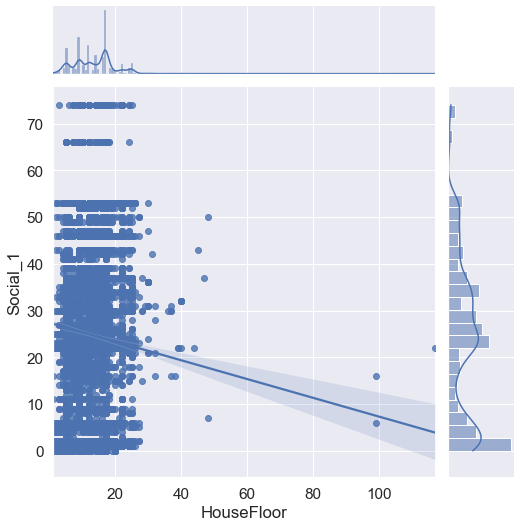

In [3371]:
grid = sns.jointplot(train_df4['HouseFloor'], train_df4['Social_1'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [3364]:
train_df4.describe()

,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,LifeSquare,KitchenSquare,ind0,Price_x,FirstFloor,Corridor,MeanRoom,PriceOfMeter,Price_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.054115,8.526700,13.435700,1984.863800,0.118858,24.687000,5352.157400,8.039200,1085.909800,32.361476,8.26980,4999.50000,214138.857399,0.074300,15.422839,18.456000,3992.290565,214138.857399
std,0.839512,18.774576,5.241148,6.094012,18.409979,0.119025,17.532614,4006.799803,23.831875,842.812868,11.195980,2.23797,2886.89568,92872.293865,0.262272,6.681259,5.151054,1213.814582,92872.293865
min,0.000000,1.136859,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,8.822988,3.00000,0.00000,59174.778028,0.000000,-18.863141,1.146278,810.825491,59174.778028
25%,1.000000,41.764480,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,506.000000,23.000000,7.00000,2499.75000,153872.633942,0.000000,10.959812,15.042991,3164.233278,153872.633942
50%,2.000000,52.487495,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,830.000000,31.000000,8.00000,4999.50000,192269.644879,0.000000,13.543134,17.512556,3999.157403,192269.644879
75%,2.000000,65.885863,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,38.000000,10.00000,7499.25000,249135.462171,0.000000,18.929857,21.478793,4555.780400,249135.462171
max,19.000000,275.645284,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,123.139863,32.00000,9999.00000,633233.466570,1.000000,148.645284,107.000000,13482.437768,633233.466570


In [3374]:
test_df4['Corridor'] = test_df4["Square"] - test_df4["LifeSquare"] - train_df4["KitchenSquare"]
#train_df4['MeanRoom'] = ?(train_df4["Rooms"] == 0 , train_df4["LifeSquare"], train_df4["LifeSquare"]/train_df4["Rooms"])
test_df4['MeanRoom'] = test_df4["LifeSquare"]
test_df4.loc[test_df4['Rooms'] != 0, 'MeanRoom'] =  test_df4["LifeSquare"]/test_df4["Rooms"]
#train_df4['MeanRoom'] = train_df4['MeanRoom'].astype(int)
#df.a = df.a.astype(float)
test_df4 = test_df4.merge(MeanMeterOfStreet, left_on=['DistrictId', 'Rooms'], right_on=['DistrictId', 'Rooms'], how='left')


test_df4.drop(columns=['Shops_2', 'Ecology_2', 'Ecology_3', 'Helthcare_2', 'Shops_1'], axis=1, inplace=True)


,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,LifeSquare,KitchenSquare,ind0,Corridor,MeanRoom,PriceOfMeter
0,4567,44,1.0,36.847630,5,9.0,1970,0.036122,24,4378,0,1036.0,19.094182,5.0,0,7.753448,19.094182,4836.111584
1,5925,62,1.0,42.493907,7,17.0,2017,0.072158,2,629,1,500.0,22.000000,10.0,1,12.493907,22.000000,2912.314354
2,960,27,2.0,59.463678,19,19.0,1977,0.211401,9,1892,0,758.0,34.000000,9.0,2,15.463678,17.000000,2643.083383
3,3848,23,3.0,49.646030,2,2.0,1965,0.014073,2,475,0,265.0,30.000000,6.0,3,10.646030,10.000000,2129.590685
4,746,74,1.0,53.837056,8,17.0,1977,0.309479,35,7715,4,990.0,31.000000,10.0,4,13.837056,31.000000,3443.586534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,6,6.0,1962,0.069660,31,6119,4,791.0,27.000000,5.0,4995,6.177521,13.500000,4159.022373
4996,16138,38,3.0,93.698122,21,27.0,2018,0.060753,15,2787,2,520.0,55.000000,10.0,4996,28.698122,18.333333,4242.102177
4997,3912,101,1.0,33.656723,2,5.0,1966,0.038693,28,6533,1,1015.0,19.003259,5.0,4997,6.653464,19.003259,4654.698959
4998,5722,10,1.0,38.635155,8,14.0,1970,0.089040,33,7976,5,871.0,20.976257,9.0,4998,10.658898,20.976257,4585.744172


In [3378]:
test_df4.loc[test_df4['PriceOfMeter'].isna(), 'PriceOfMeter'] = test_df4['PriceOfMeter'].median()
test_df4.describe()

,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,LifeSquare,KitchenSquare,ind0,Corridor,MeanRoom,PriceOfMeter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.910000,56.449500,8.632000,13.395000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1088.140400,32.661550,8.213000,2499.500000,15.522950,18.394824,3989.393800
std,0.838594,19.092787,5.483228,6.231945,18.573149,0.120070,17.532202,4026.614773,23.863762,863.034749,11.380020,2.208576,1443.520003,8.437678,5.233888,1163.175313
min,0.000000,1.378543,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,2.968086,3.000000,0.000000,-21.024231,1.913432,1016.753916
25%,1.000000,41.906231,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,504.000000,23.000000,6.000000,1249.750000,9.774723,15.000000,3164.233278
50%,2.000000,52.921340,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,817.000000,31.050493,8.000000,2499.500000,13.925282,17.606182,3999.776438
75%,2.000000,66.285129,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1579.000000,38.240069,10.000000,3749.250000,20.288286,21.149760,4562.633616
max,17.000000,223.453689,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,118.055342,24.000000,4999.000000,107.453689,102.000000,13482.437768


In [3375]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [3379]:
predictions = rf_model_rs.predict(test_df4)
predictions

array([148574.21951719, 119912.02317591, 145644.92821221, ...,
       149069.720806  , 185542.08934854, 264540.23600862])

In [3380]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,148574.219517
1,5925,119912.023176
2,960,145644.928212
3,3848,125177.417239
4,746,176363.575150


In [3381]:
submit.shape

(5000, 2)

In [3382]:
submit.to_csv('gb_submit.csv', index=False)